# Distributions for new gas price variable, using two weeks of data
(08/24/23-09/07/23), code reference: 11/29/23, 1:39
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Calculate newgasprice
### Generate summary statistics, histogram for newgasprice


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy


#package for analysis of distribution fit
from fitter import Fitter, get_common_distributions, get_distributions

#import gzip

In [2]:
from pathlib import Path

# Data folder location

####data_folder = ADD LOCATION HERE


#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df1 = pd.read_csv(limited_df)


df1 = df1.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending']]
df1.shape



(10505807, 4)

## Remove rows where timepending is missing, or where timepending = 0 
### (only zero for private transactions that would not show up in mempool)

In [3]:
df = df1[df1.timepending != 0].copy()

df.shape

(10475691, 4)

In [4]:
#df.head()
del df1
del limited_df

## Calculate newgasprice

In [5]:
#Calculate gasprice variable
#df["maxpriorityfeepergas"].describe()
#df["basefeepergas"].describe()
#df["maxfeepergas"].describe()

df['mybid'] = df['basefeepergas'] + df['maxpriorityfeepergas']

df['newgasprice'] = df[['mybid','maxfeepergas']].values.min(axis=1)

df.shape

(10475691, 6)

In [6]:
df['mybid'].describe()

count    1.047569e+07
mean     2.100810e+10
std      1.902532e+10
min      8.020358e+09
25%      1.253770e+10
50%      1.639134e+10
75%      2.436266e+10
max      2.001814e+13
Name: mybid, dtype: float64

In [7]:
df['newgasprice'].describe()

count    1.047569e+07
mean     2.034602e+10
std      1.808765e+10
min      8.020358e+09
25%      1.244831e+10
50%      1.609097e+10
75%      2.345631e+10
max      2.000050e+13
Name: newgasprice, dtype: float64

In [8]:
#Visual check that new gas price is calculated correctly (print 20 rows)

#df.iloc[1:20, :]


In [ ]:
#some examples where the maxfeepergas determined the new gas price
#df[df['maxfeepergas']==df['newgasprice']].iloc[1:10, : ]


In [ ]:
#some examples where the base fee and tip determined the new gas price
#df2[df2['maxfeepergas']!=df2['newgasprice']].iloc[1:10, :]
#df2[df2['maxfeepergas']!=df2['newgasprice']].iloc[1:10, [21,19,27,20,28]]

In [10]:
#Convert to ETH per gas (newgasprice is in gwei per gas)
df['newgasprice_'] = df['newgasprice']/(10**9)
df['newgasprice_'].describe()

count    1.047569e+07
mean     2.034602e+01
std      1.808765e+01
min      8.020358e+00
25%      1.244831e+01
50%      1.609097e+01
75%      2.345631e+01
max      2.000050e+04
Name: newgasprice_, dtype: float64

In [11]:
#find 99th percentile for newgasprice_
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df['newgasprice_'], 99)
x

69.398723159

In [ ]:
#some examples where newgasprice_ > 120
#df[df['newgasprice_'] > 120].iloc[1:10, [21,19,27,20,28,29]]
#df[df['newgasprice_'] > 120].iloc[1:10, :]

In [12]:
#del df10
df10  = df[df['newgasprice_']<x]
#df10['newgasprice_'].describe()

## Gas Price Plot and summary statistics

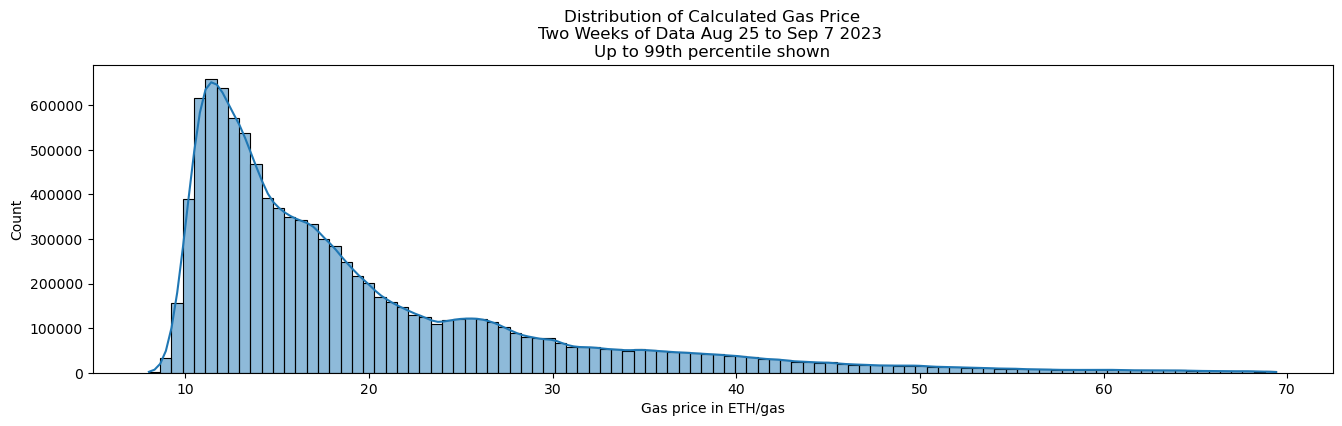

In [13]:
#Plot of calculated gas price that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['newgasprice_'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Calculated Gas Price\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Gas price in ETH/gas')

#sns.histplot(includable_df['GUPB'], bins=100, kde=True, edgecolor = 'black')
plt.show()

In [ ]:
#NOTE: df has all finalized rows, d10 excludes the top 1% of newgasprice values
df['newgasprice_'].describe()

## Starting here: following steps described on medium.com

https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9


## **Data preparation (newgasprice)

In [13]:
#convert to a numpy array
newgasprice = df['newgasprice'].values

## **Fitting distributions  (newgasprice)

Use trick from here: https://fitter.readthedocs.io/en/latest/references.html
limit to 10 distributions at a time

SKIPPED _fit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
_fit was not fitted. no parameters available
alpha was not fitted. no parameters available
beta was not fitted. no parameters available
argus was not fitted. no parameters available
arcsine was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
_fit,inf,inf,inf,inf,NaN,NaN
alpha,inf,inf,inf,inf,NaN,NaN
beta,inf,inf,inf,inf,NaN,NaN
argus,inf,inf,inf,inf,NaN,NaN
arcsine,inf,inf,inf,inf,NaN,NaN


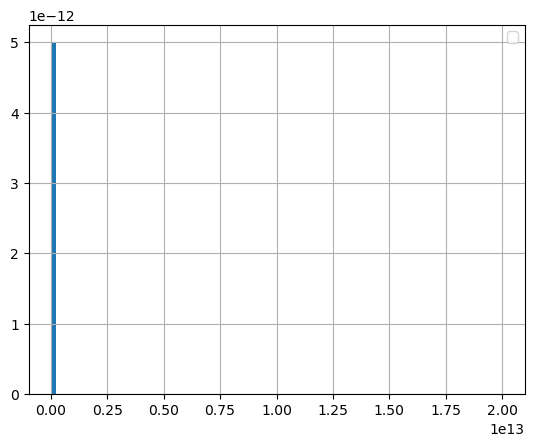

In [17]:
## First 9 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[0:10]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more than 30 seconds)
chi was not fitted. no parameters available
erlang was not fitted. no parameters available
chi2 was not fitted. no parameters available
dgamma was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,2.476098e-23,1.668530e+05,1.668814e+05,inf,0.126155,0.0
chi,inf,inf,inf,inf,NaN,NaN
erlang,inf,inf,inf,inf,NaN,NaN
chi2,inf,inf,inf,inf,NaN,NaN
dgamma,inf,inf,inf,inf,NaN,NaN


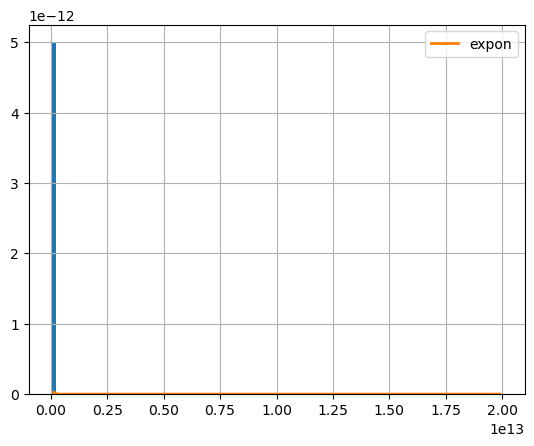

In [18]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[10:20]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED f distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED foldnorm distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
SKIPPED genexpon distribution (taking more than 30 seconds)
f was not fitted. no parameters available
exponpow was not fitted. no parameters available
foldnorm was not fitted. no parameters available
exponweib was not fitted. no parameters available
gamma was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
f,inf,inf,inf,inf,NaN,NaN
exponpow,inf,inf,inf,inf,NaN,NaN
foldnorm,inf,inf,inf,inf,NaN,NaN
exponweib,inf,inf,inf,inf,NaN,NaN
gamma,inf,inf,inf,inf,NaN,NaN


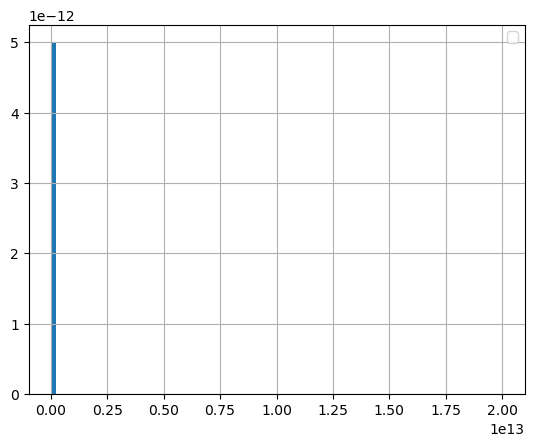

In [19]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[20:30]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [ ]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[30:40]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)
SKIPPED gennorm distribution (taking more than 30 seconds)
SKIPPED genlogistic distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)
SKIPPED gibrat distribution (taking more than 30 seconds)
SKIPPED gompertz distribution (taking more than 30 seconds)
genhalflogistic was not fitted. no parameters available
genhyperbolic was not fitted. no parameters available
genextreme was not fitted. no parameters available
gengamma was not fitted. no parameters available
genpareto was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when le

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhalflogistic,inf,inf,inf,inf,NaN,NaN
genhyperbolic,inf,inf,inf,inf,NaN,NaN
genextreme,inf,inf,inf,inf,NaN,NaN
gengamma,inf,inf,inf,inf,NaN,NaN
genpareto,inf,inf,inf,inf,NaN,NaN


Error in callback <function _draw_all_if_interactive at 0x000001B215174E00> (for post_execute):


SKIPPED gumbel_r distribution (taking more than 30 seconds)
SKIPPED halfcauchy distribution (taking more than 30 seconds)
SKIPPED halfnorm distribution (taking more than 30 seconds)
SKIPPED hypsecant distribution (taking more than 30 seconds)
SKIPPED invgamma distribution (taking more than 30 seconds)
SKIPPED halflogistic distribution (taking more than 30 seconds)
SKIPPED halfgennorm distribution (taking more than 30 seconds)
SKIPPED gumbel_l distribution (taking more than 30 seconds)
SKIPPED invgauss distribution (taking more than 30 seconds)
SKIPPED invweibull distribution (taking more than 30 seconds)
gumbel_r was not fitted. no parameters available
halfcauchy was not fitted. no parameters available
halfnorm was not fitted. no parameters available
hypsecant was not fitted. no parameters available
invgamma was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called w

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gumbel_r,inf,inf,inf,inf,NaN,NaN
halfcauchy,inf,inf,inf,inf,NaN,NaN
halfnorm,inf,inf,inf,inf,NaN,NaN
hypsecant,inf,inf,inf,inf,NaN,NaN
invgamma,inf,inf,inf,inf,NaN,NaN


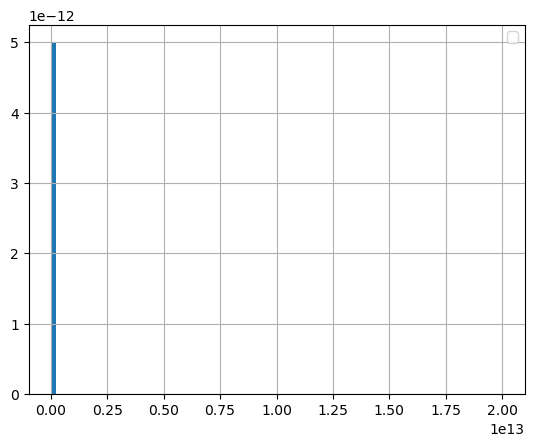

In [10]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[40:50]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED kstwo distribution (taking more than 30 seconds)
SKIPPED johnsonsb distribution (taking more than 30 seconds)
SKIPPED ksone distribution (taking more than 30 seconds)
SKIPPED kappa3 distribution (taking more than 30 seconds)
SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kstwobign distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
SKIPPED laplace_asymmetric distribution (taking more than 30 seconds)
SKIPPED levy distribution (taking more than 30 seconds)
kstwo was not fitted. no parameters available
johnsonsb was not fitted. no parameters available
ksone was not fitted. no parameters available
kappa3 was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace,2.499970e-23,inf,inf,inf,0.20664,0.0
kstwo,inf,inf,inf,inf,NaN,NaN
johnsonsb,inf,inf,inf,inf,NaN,NaN
ksone,inf,inf,inf,inf,NaN,NaN
kappa3,inf,inf,inf,inf,NaN,NaN


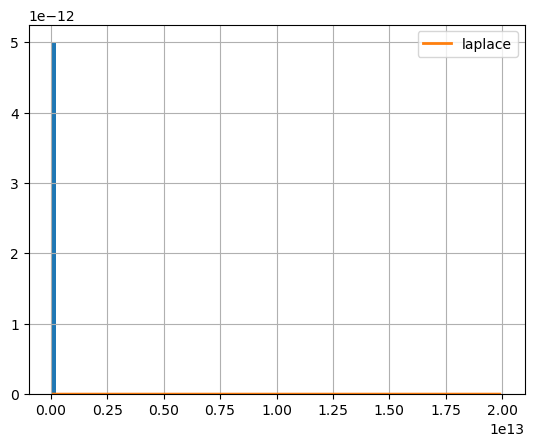

In [11]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[50:60]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED levy_l distribution (taking more than 30 seconds)
SKIPPED loglaplace distribution (taking more than 30 seconds)
SKIPPED logistic distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED maxwell distribution (taking more than 30 seconds)
SKIPPED mielke distribution (taking more than 30 seconds)
levy_l was not fitted. no parameters available
loglaplace was not fitted. no parameters available
logistic was not fitted. no parameters available
lomax was not fitted. no parameters available
lognorm was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
levy_l,inf,inf,inf,inf,NaN,NaN
loglaplace,inf,inf,inf,inf,NaN,NaN
logistic,inf,inf,inf,inf,NaN,NaN
lomax,inf,inf,inf,inf,NaN,NaN
lognorm,inf,inf,inf,inf,NaN,NaN


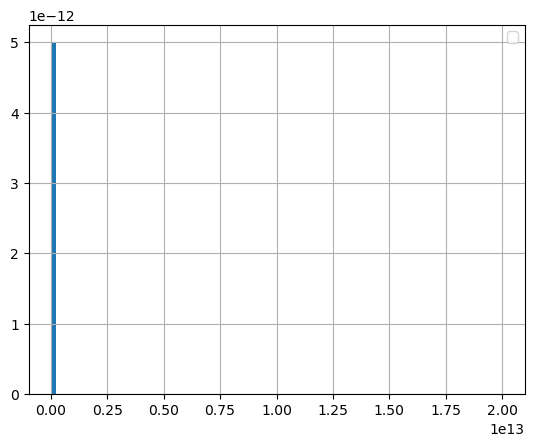

In [12]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[60:70]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nakagami distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED moyal distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
ncf was not fitted. no parameters available
nakagami was not fitted. no parameters available
nct was not fitted. no parameters available
moyal was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,2.500244e-23,4.065235e+07,4.065238e+07,0.000292,0.267179,0.0
ncf,inf,inf,inf,inf,NaN,NaN
nakagami,inf,inf,inf,inf,NaN,NaN
nct,inf,inf,inf,inf,NaN,NaN
moyal,inf,inf,inf,inf,NaN,NaN


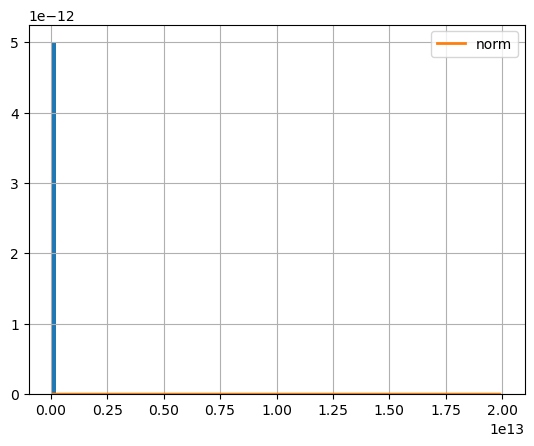

In [13]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[70:80]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rayleigh distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
SKIPPED rel_breitwigner distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
powerlognorm was not fitted. no parameters available
reciprocal was not fitted. no parameters available
rice was not fitted. no parameters available
rayleigh was not fitted. no parameters available
powernorm was not fitted. no parameters available
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlognorm,inf,inf,inf,inf,NaN,NaN
reciprocal,inf,inf,inf,inf,NaN,NaN
rice,inf,inf,inf,inf,NaN,NaN
rayleigh,inf,inf,inf,inf,NaN,NaN
powernorm,inf,inf,inf,inf,NaN,NaN


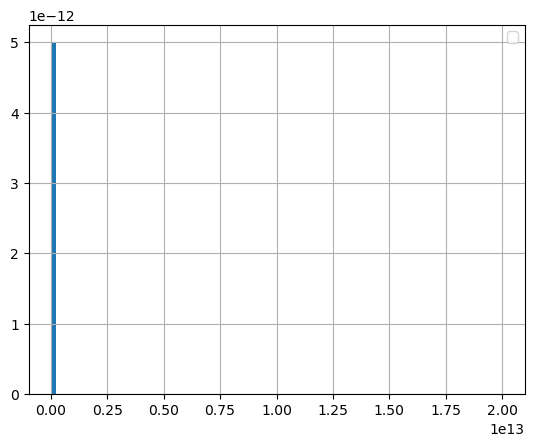

In [14]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[80:90]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

In [ ]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = f.distributions[90:100]
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

SKIPPED trapezoid distribution (taking more than 30 seconds)
SKIPPED skewnorm distribution (taking more than 30 seconds)
SKIPPED skewcauchy distribution (taking more than 30 seconds)
SKIPPED semicircular distribution (taking more than 30 seconds)
SKIPPED trapz distribution (taking more than 30 seconds)
SKIPPED t distribution (taking more than 30 seconds)
SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED studentized_range distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)
SKIPPED truncnorm distribution (taking more than 30 seconds)
C:\Users\Checkout\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
trapezoid,inf,inf,inf,inf,NaN,NaN
skewnorm,inf,inf,inf,inf,NaN,NaN
skewcauchy,inf,inf,inf,inf,NaN,NaN
semicircular,inf,inf,inf,inf,NaN,NaN
trapz,inf,inf,inf,inf,NaN,NaN


C:\Users\Checkout\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
SKIPPED truncweibull_min distribution (taking more than 30 seconds)
SKIPPED tukeylambda distribution (taking more than 30 seconds)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED wald distribution (taking more than 30 seconds)
SKIPPED truncpareto distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
SKIPPED wrapcauchy distribution (taking more than 30 seconds)
vonmises_fisher was not fitted. no parameters available
truncweibull_min was not fitted. no parameters available
tukeylambda was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,2.475401e-23,6129.275460,6157.604596,inf,9.935449e-01,0.0
vonmises,2.532998e+00,373.577063,416.070767,inf,3.183178e+12,0.0
vonmises_fisher,inf,inf,inf,inf,NaN,NaN
truncweibull_min,inf,inf,inf,inf,NaN,NaN
tukeylambda,inf,inf,inf,inf,NaN,NaN


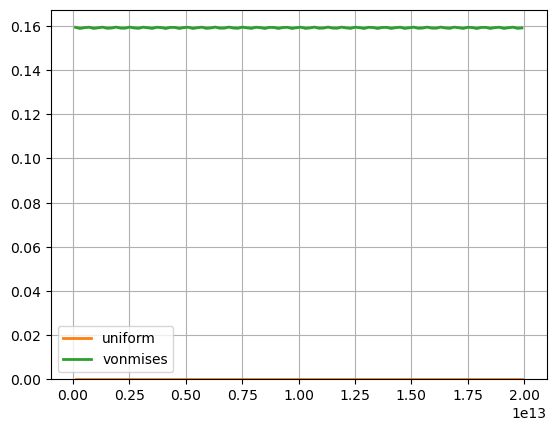

In [14]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = 
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()

## Just the distributions that ran successfully

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,2.475401e-23,6.129275e+03,6.157605e+03,inf,9.935449e-01,0.0
expon,2.476098e-23,1.668530e+05,1.668814e+05,inf,1.261545e-01,0.0
laplace,2.499970e-23,inf,inf,inf,2.066402e-01,0.0
norm,2.500244e-23,4.065235e+07,4.065238e+07,0.000292,2.671792e-01,0.0
vonmises,2.532998e+00,3.735771e+02,4.160708e+02,inf,3.183178e+12,0.0


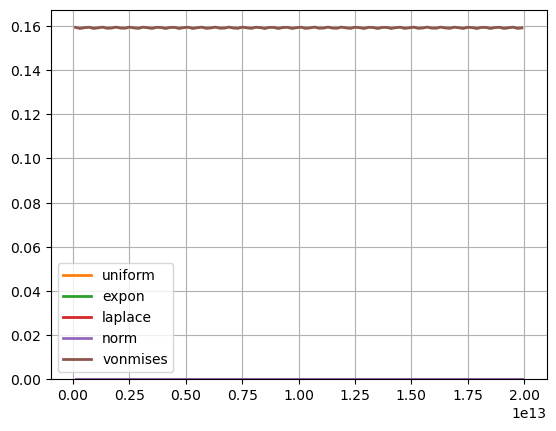

In [15]:
## Next 10 distributions
f = Fitter(newgasprice)
f.distributions = ['expon'] + ['laplace']+ ['norm'] + ['uniform'] + ['vonmises']
f.fit()
#Generate the fitted distribution summary using .summary( ) method
f.summary()